1. Step-by-step in YOLO (simplified) : You Only Look Once

Divide the image into an S × S grid
Each cell is responsible for detecting objects whose center lies in that cell.

Each cell predicts:

Bounding boxes (x, y, w, h)

Objectness score (how likely an object is present)

Class probabilities (distribution over possible classes)

So final score = objectness × class probability.

Filtering predictions:

First, throw away boxes with low confidence (objectness × class probability < threshold).

At this stage, IoU is not used yet.

Non-Maximum Suppression (NMS) (this is where IoU comes in):

Among the remaining boxes, multiple boxes may overlap for the same object.

Select the box with the highest confidence.

Suppress (remove) all other boxes that have IoU > threshold with that box (e.g., IoU > 0.5).

Repeat for the next highest-confidence box.

2. Why suppress high IoU

If two boxes both claim the same object (like two "dog" boxes overlapping 80%), we don’t want duplicates.
So we suppress the weaker one (lower confidence).

3. Why keep low IoU

If two boxes overlap only a little (say IoU = 0.2), they’re probably pointing to different objects that are close together.

Example: Two people standing side by side.

Their bounding boxes overlap slightly (low IoU), but they’re actually two separate persons.

If we suppress low IoU boxes, we’d wrongly remove one of them → missing detections.

4. Rule of Thumb in NMS

High IoU → suppress (duplicate detection of same object).

Low IoU → keep (likely different objects).

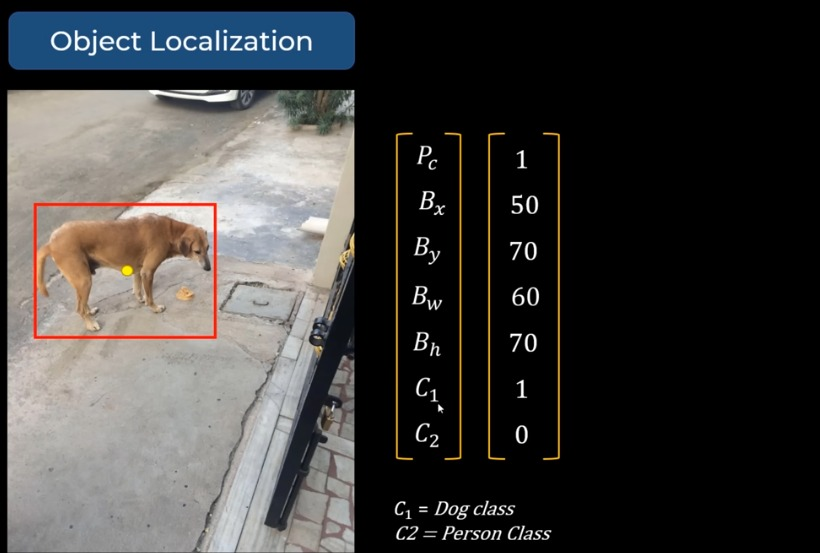 .
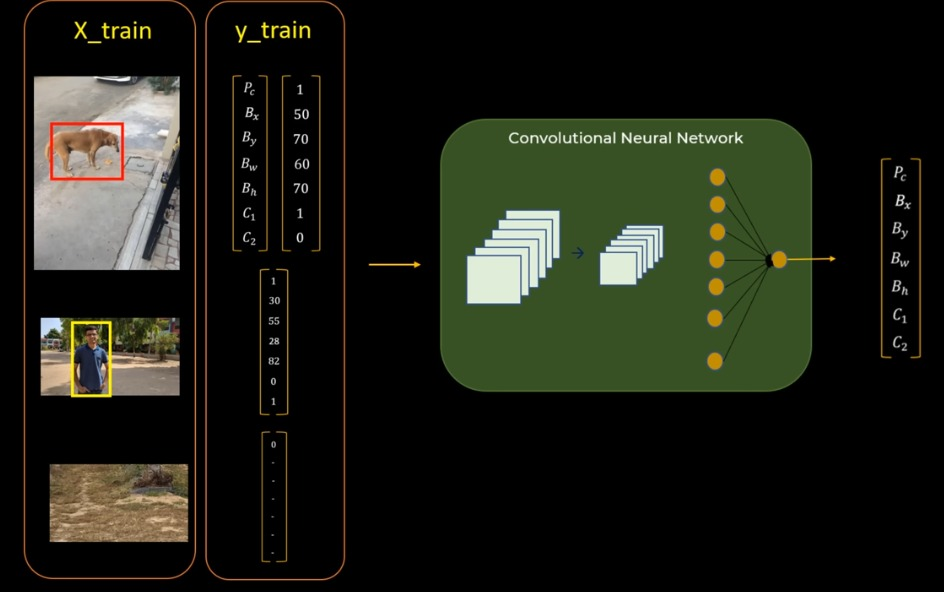


Single Object Detection

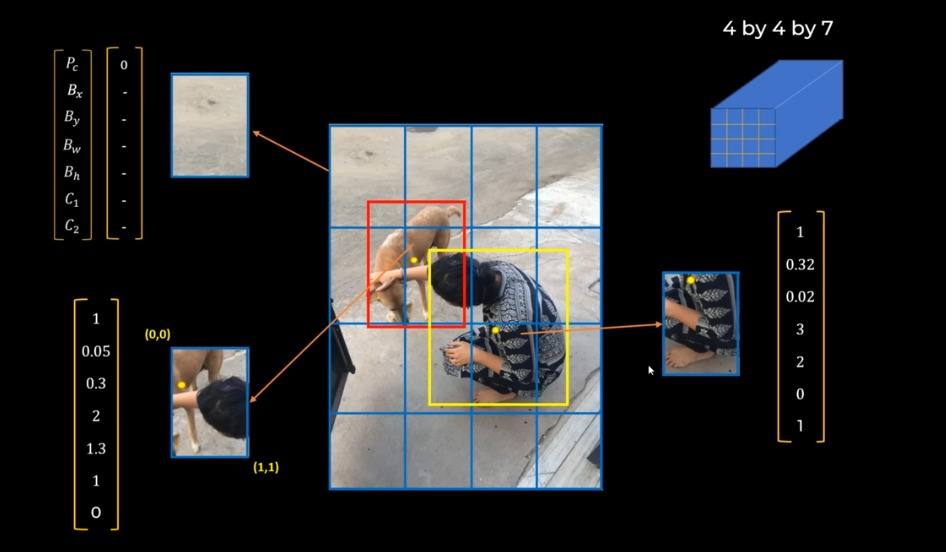

YOLO algo :  for multiple object detection (centre of each object)

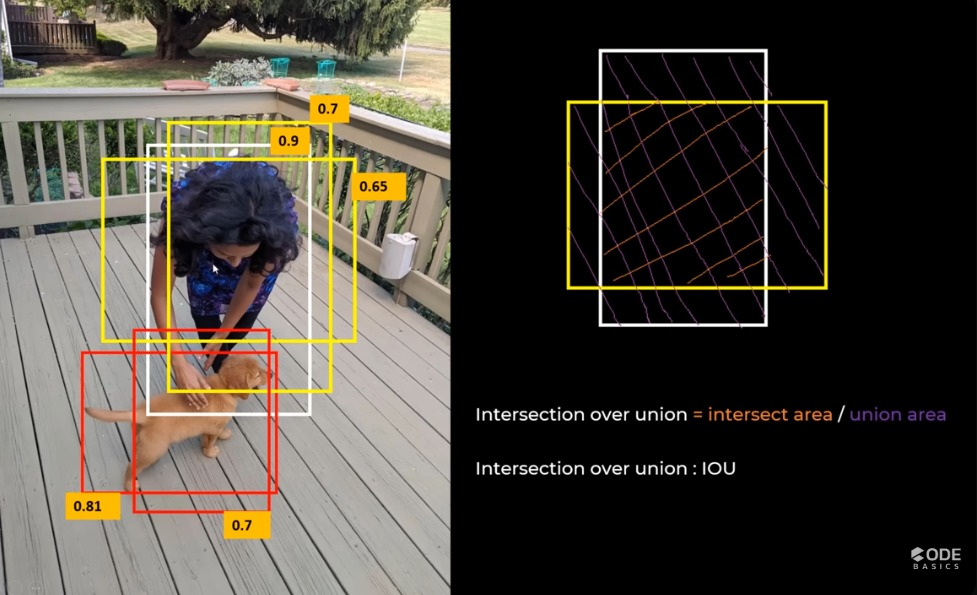

For IOU concept for multiple object detection 
->Low IOU and High Confidence(Probability)

In [1]:
!pip install ultralytics


  Using cached ultralytics-8.3.184-py3-none-any.whl.metadata (37 kB)
  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp313-cp313-win_amd64.whl.metadata (6.1 kB)
  Using cached ultralytics_thop-2.0.16-py3-none-any.whl.metadata (14 kB)
Using cached ultralytics-8.3.184-py3-none-any.whl (1.1 MB)
Using cached torch-2.8.0-cp313-cp313-win_amd64.whl (241.3 MB)
Using cached torchvision-0.23.0-cp313-cp313-win_amd64.whl (1.6 MB)
Using cached ultralytics_thop-2.0.16-py3-none-any.whl (28 kB)

   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   ---------------------------------------- 0/4 [torch]
   --------

In [8]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO12n model
model = YOLO("yolo12n.pt")

# Run inference with the YOLO12n model on the 'bus.jpg' image
results = model(r"C:\Users\Rajeev Ranjan\Desktop\Coding Folder\Projects\Jupyter NoteBook\datasets\coco8\images\val\000000000036.jpg")


image 1/1 C:\Users\Rajeev Ranjan\Desktop\Coding Folder\Projects\Jupyter NoteBook\datasets\coco8\images\val\000000000036.jpg: 640x512 1 person, 1 umbrella, 151.3ms
Speed: 5.7ms preprocess, 151.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


In [9]:
model = YOLO("yolo12n.pt")
print(model.model.names)  # Displays class names dictionary
print(len(model.model.names))  # Prints the number of classes

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw